In [ ]:
# Sepehr Moniri
# 981813205

# One layer Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs, make_moons

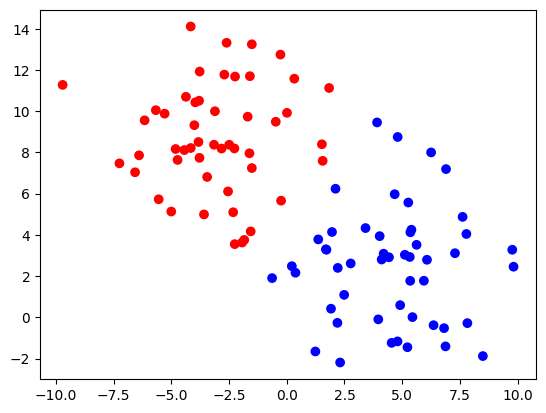

In [2]:
data, label = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.75, random_state=42)
plt.scatter(data[:,0], data[:,1], c=label, cmap="bwr_r")

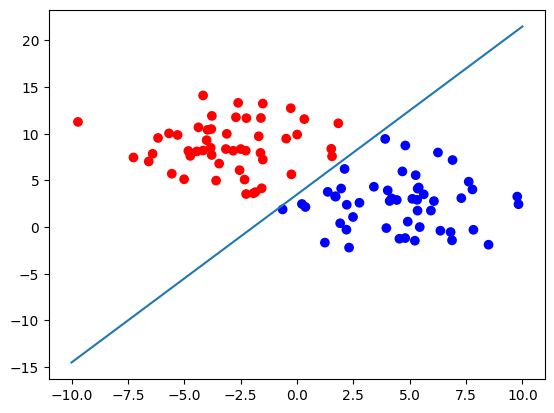

In [3]:
# a = np.array([0,3,5,0.5,0.25,4]) # 1.8
a = np.array([1.8]) # 1.8
# b = np.array([1,2,5,0.5,0.25,4]) # 3.5
b = np.array([3.5]) # 3.5

x = np.linspace(-10,10,30)
plt.scatter(data[:,0], data[:,1], c=label, cmap="bwr_r")
for i in range(len(a)):
    y = a[i]*x + b[i]
    plt.plot(x, y)


In [12]:
class Perceptron:
    def __init__(self, num_features=2, learning_rate=0.1, epochs=100):
        self.weights = np.ones(num_features)
        self.bias = 2
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return np.array(x>=0, dtype=np.bool_)

    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return self.activation_function(weighted_sum)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

In [13]:
model = Perceptron()
model.fit(data, label)

In [14]:
model.weights

array([ 1.57918681, -0.87016117])

In [15]:
model.bias

2.9000000000000012

# Multilayer Perceptron

In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

In [2]:
student_id = 981813205

X, y = make_moons(n_samples=200, noise=0.05, random_state=student_id)
# X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2.75, random_state=student_id)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

In [3]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # weights and biases -- hidden layer
        self.weights_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(1, self.hidden_size)
        
        # weights and biases -- output layer
        self.weights_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def forward(self, inputs):
        # Forward pass through the hidden layer with ReLU activation
        hidden_output = self.relu(np.dot(inputs, self.weights_hidden) + self.bias_hidden)
        
        # Forward pass through the output layer with sigmoid activation
        output = self.sigmoid(np.dot(hidden_output, self.weights_output) + self.bias_output)
        
        return output, hidden_output
    
    def backward(self, inputs, targets, outputs, hidden_output, learning_rate):
        # Calculate error at the output layer
        output_error = targets - outputs
        
        # Calculate gradients for the output layer
        output_delta = output_error * self.sigmoid_derivative(outputs)
        
        # Calculate error at the hidden layer
        hidden_error = np.dot(output_delta, self.weights_output.T)
        
        # Calculate gradients for the hidden layer with ReLU activation
        hidden_delta = hidden_error * self.relu_derivative(hidden_output)
        
        # Update weights and biases for both layers
        self.weights_output += np.dot(hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        
        self.weights_hidden += np.dot(inputs.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            outputs, hidden_output = self.forward(inputs)
            self.backward(inputs, targets, outputs, hidden_output, learning_rate)
            
            if epoch % 100 == 0:
                error = np.mean((targets - outputs) ** 2)
                print(f"Epoch {epoch}: Mean Squared Error = {error}")

In [4]:
model = MultilayerPerceptron(input_size=X_train.shape[1], hidden_size=3, output_size=1)

model.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.1)

Epoch 0: Mean Squared Error = 0.2702312532873623
Epoch 100: Mean Squared Error = 0.055738062105420004
Epoch 200: Mean Squared Error = 0.05501735730519576
Epoch 300: Mean Squared Error = 0.05483494995961806
Epoch 400: Mean Squared Error = 0.05476763002026559
Epoch 500: Mean Squared Error = 0.054714136600681584
Epoch 600: Mean Squared Error = 0.054699338907464555
Epoch 700: Mean Squared Error = 0.05467116255095972
Epoch 800: Mean Squared Error = 0.054658147042814485
Epoch 900: Mean Squared Error = 0.054640286192478495


In [5]:
predictions = model.forward(X_test)[0]
print("Final predictions:")
print(predictions)

Final predictions:
[[0.00223342]
 [0.62264257]
 [0.93696307]
 [0.99482084]
 [0.99364111]
 [0.02150664]
 [0.33764883]
 [0.28802269]
 [0.69374468]
 [0.98321354]
 [0.9600903 ]
 [0.99280026]
 [0.18393069]
 [0.04396983]
 [0.05866162]
 [0.99248869]
 [0.57781633]
 [0.93861887]
 [0.59459279]
 [0.02667751]
 [0.40233686]
 [0.95673002]
 [0.02732569]
 [0.01922654]
 [0.99429822]
 [0.87159468]
 [0.00588126]
 [0.01589137]
 [0.83459104]
 [0.52450963]
 [0.00233108]
 [0.01751003]
 [0.98985687]
 [0.0681317 ]
 [0.99459143]
 [0.00730348]
 [0.01586447]
 [0.97065626]
 [0.07343211]
 [0.0385307 ]]
